In [2]:
import pandas as pd
import numpy as np
from decouple import config
from fNeuro.utils.pickling import load_pickle
from fNeuro.connectivity.connectivity import get_mean_correlation_matrix, Cyclic_analysis, eigen_values, cyclic_order, node_relationship
from nilearn import datasets, plotting
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import re
import pingouin as pg
import math

Get time series

In [3]:
resting_path = config('resting')
time_series = load_pickle(os.path.join(resting_path, 'measures', 'time_series'))
an_time_series = list(time_series['an'].values())
hc_time_series = list(time_series['hc'].values())
group_ordered = np.asarray(hc_time_series + an_time_series)
group = np.asarray(an_time_series + hc_time_series)
msdl = datasets.fetch_atlas_msdl()

## Cyclic ordering

Create connectome dictionary

In [4]:
participant_order = load_pickle(os.path.join(resting_path, 'measures', 'connectome_participant_order'))
order = [re.findall('B\d\d\d\d', participant)[0] for participant in participant_order]
connect = Cyclic_analysis(to_vectorize=False).fit(group_ordered)
connectome_dictionary = dict(zip(order, connect))

In [5]:
correlation_matrix = get_mean_correlation_matrix(group, msdl['labels'])
individual_ordering = eigen_values(connectome_dictionary, msdl['labels'])

In [6]:
an_orders = cyclic_order(correlation_matrix['an_mean_correlations'])
an_orders

,regions,eigenvalue_moduli,leading_eigenvector,leading_eigenvector_component_phases
0,R Ins,1.015942e-15,-0.323405-0.000000j,-3.141593
1,L STS,3.472781e+00,-0.091685-0.002016j,-3.119608
2,Striate,3.019709e+01,-0.190239-0.013666j,-3.069880
3,Basal,8.890647e+00,-0.121796-0.039475j,-2.828172
4,L Aud,3.575048e+01,-0.042032-0.061679j,-2.168973
5,R TPJ,1.842472e+00,0.018197-0.044980j,-1.186365
6,R Post Temp,8.890647e+00,0.081528-0.013668j,-0.166099
7,R IPS,6.317231e+00,0.131973+0.025213j,0.188773
8,Med DMN,2.407938e+01,0.107013+0.039310j,0.352041
9,R DMN,1.945593e+01,0.055922+0.024653j,0.415220


In [7]:
hc_orders = cyclic_order(correlation_matrix['hc_mean_correlations'])
hc_orders

,regions,eigenvalue_moduli,leading_eigenvector,leading_eigenvector_component_phases
0,Sup Front S,2.616217e+00,-0.306558-0.000000j,-3.141593
1,R Post Temp,1.403096e+01,-0.038521-0.004765j,-3.018526
2,L DMN,3.693774e+01,-0.079674-0.018260j,-2.916305
3,L DLPFC,1.174626e+01,-0.143402-0.035495j,-2.898950
4,R Front pol,1.542539e+01,-0.114722-0.036833j,-2.830927
5,R Par,1.542539e+01,-0.190671-0.092380j,-2.690422
6,R TPJ,2.369798e+00,-0.161900-0.099958j,-2.588475
7,L Par,1.174626e+01,-0.142149-0.092271j,-2.565839
8,Broca,2.616217e+00,-0.126705-0.111841j,-2.418427
9,L Front pol,1.085989e+01,-0.103718-0.105825j,-2.346139


In [8]:
plotting_hc = pd.merge(pd.DataFrame(data={'coords': msdl['region_coords'], 'regions': msdl['labels']}), hc_orders, on='regions', how='right')

/home/k1812017/.conda/envs/neuroimaging/lib/python3.10/site-packages/nilearn/plotting/displays/_projectors.py:190: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(


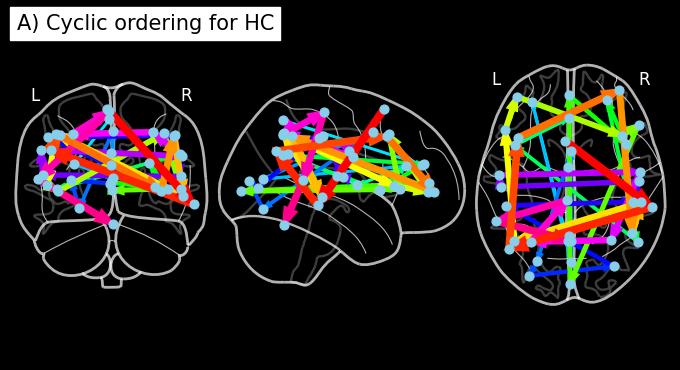

In [22]:
plotting_hc = pd.merge(pd.DataFrame(data={'coords': msdl['region_coords'], 'regions': msdl['labels']}), 
                       hc_orders, on='regions', how='right')
adja = np.zeros((plotting_hc.shape[0], plotting_hc.shape[0]))
offset_dig = [val*2 for val in range(round(-plotting_hc.shape[0]/2), math.floor(plotting_hc.shape[0]/2))]
adja = np.diag(offset_dig, 1)
adja = np.delete(adja, 39, axis=0)
adja = np.delete(adja, 39, axis=1)
adja_df = pd.DataFrame( adja,
                 columns=plotting_hc['regions'], 
                 index=plotting_hc['regions'])
plotting.plot_connectome(adja_df.values, 
                         plotting_hc['coords'].to_list(),
                         node_color='skyblue',
                         node_size=40,
                         edge_cmap='hsv',
                         black_bg=True,
                         title='A) Cyclic ordering for HC')

/home/k1812017/.conda/envs/neuroimaging/lib/python3.10/site-packages/nilearn/plotting/displays/_projectors.py:190: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(


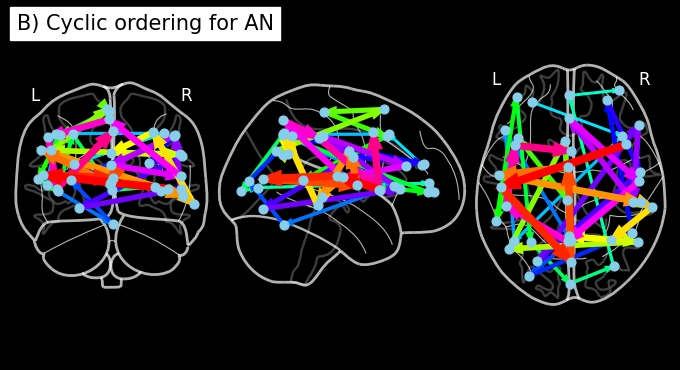

In [21]:
plotting_an = pd.merge(pd.DataFrame(data={'coords': msdl['region_coords'], 'regions': msdl['labels']}), 
                       an_orders, on='regions', how='right')
adja_df = pd.DataFrame( adja,
                 columns=plotting_an['regions'], 
                 index=plotting_an['regions'])
plotting.plot_connectome(adja_df.values, 
                         plotting_an['coords'].to_list(),
                         node_color='skyblue',
                         node_size=40,
                         edge_cmap='hsv',
                         black_bg=True,
                         title='B) Cyclic ordering for AN',)

## Cyclicity between nodes

In [11]:
workable_time_series = dict(zip(order, [*time_series['hc'].values()] + [*time_series['an'].values()]))
time_series_dataframe = dict(zip(workable_time_series.keys(),
                    list(map(lambda dataframe: pd.DataFrame(dataframe, columns=msdl['labels']), 
                                            workable_time_series.values()))))

In [12]:
area_dict = dict(zip(
    time_series_dataframe.keys(),
    list(map(node_relationship, ['L STS - R STS' for val in time_series_dataframe.keys()],
                ['R Post Temp - L IPS'for val in time_series_dataframe.keys()], time_series_dataframe.values()))
))

In [13]:
hc_relationship_between = pd.concat([area_dict[part]['between_relationship'] for part in area_dict.keys() if 'B1' in part], axis=1)
hc_relationship_within = pd.concat([area_dict[part]['within_relationship'] for part in area_dict.keys() if 'B1' in part], axis=1)
an_relationship_between = pd.concat([area_dict[part]['between_relationship'] for part in area_dict.keys() if 'B2' in part], axis=1)
an_relationship_within = pd.concat([area_dict[part]['within_relationship'] for part in area_dict.keys() if 'B2' in part], axis=1)

[Text(0.5, 1.0, 'Left Superior Temporal Sulcus - Right Superior Temporal Sulcus (red)'),
 Text(0.5, 0, 'Time point (Scans)')]

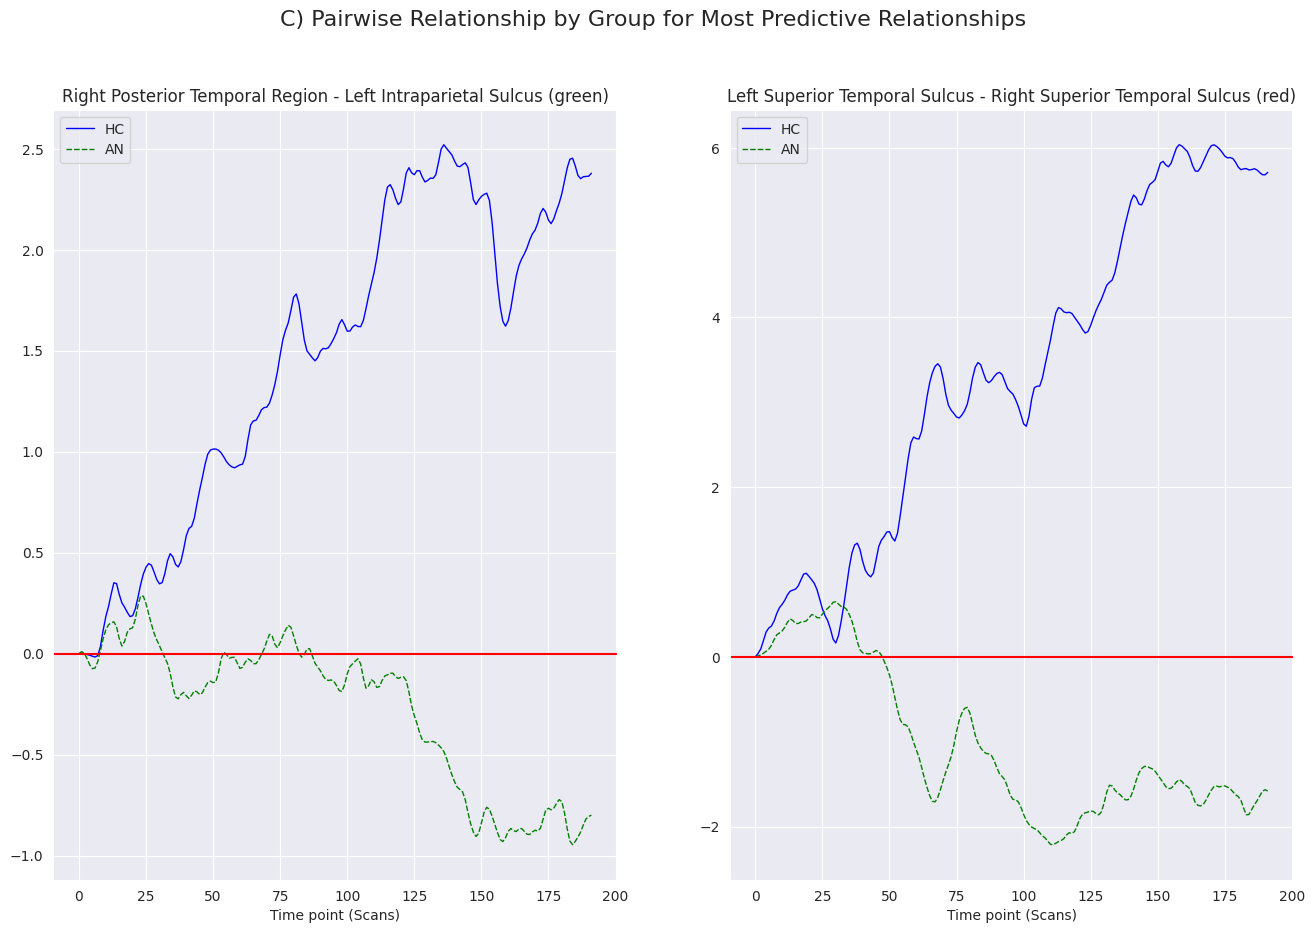

In [25]:
fig,ax = plt.subplots(1,2, figsize=(16,10))
fig.suptitle('C) Pairwise Relationship by Group for Most Predictive Relationships', fontsize=16)
plot = sns.lineplot(pd.concat((hc_relationship_within.mean(axis=1), an_relationship_within.mean(axis=1)), axis=1).rename(columns ={0: 'HC', 1: 'AN' }),
                    ax=ax[0], lw=1, palette=['b', 'g'])
plot.axhline(0.0, color="red")
plot.set(title='Right Posterior Temporal Region - Left Intraparietal Sulcus (green)', xlabel="Time point (Scans)")
plot = sns.lineplot(pd.concat((hc_relationship_between.mean(axis=1), an_relationship_between.mean(axis=1) ), axis=1).rename(columns ={0: 'HC', 1: 'AN' }),
                    ax=ax[1], lw=1, palette=['b', 'g'])
plot.axhline(0.0, color="red")
plot.set(title='Left Superior Temporal Sulcus - Right Superior Temporal Sulcus (red)', xlabel="Time point (Scans)")

## Relating to behavioural measures

In [15]:
df = pd.read_csv(os.path.join(resting_path, 'neuroimaging_behavioural.csv'))
df = df.drop(df[df['B_Number'].str.contains('B2010')].index)
df = pd.merge(df,pd.DataFrame(time_series_dataframe.keys()).rename(columns={0: 'B_Number'}), on='B_Number', how='right')
an = df[df['B_Number'].str.contains('B2')]
hc = df[df['B_Number'].str.contains('B1')]

In [16]:
for col in hc.columns[1:]:
    display(f'{col} to between nodes', pg.corr(hc[col], hc_relationship_between.var(axis=0)).drop('p-val', axis=1))
    display(f'{col} to within nodes', pg.corr(hc[col], hc_relationship_within.var(axis=0)).drop('p-val', axis=1))

'edeq_global_score to between nodes'

,n,r,CI95%,BF10,power
pearson,26,0.439202,"[0.06, 0.71]",2.655,0.631998


'edeq_global_score to within nodes'

,n,r,CI95%,BF10,power
pearson,26,-0.209091,"[-0.55, 0.19]",0.401,0.178257


'anxiety to between nodes'

,n,r,CI95%,BF10,power
pearson,26,-0.075667,"[-0.45, 0.32]",0.26,0.0652


'anxiety to within nodes'

,n,r,CI95%,BF10,power
pearson,26,-0.007966,"[-0.39, 0.38]",0.244,0.049587


'depression to between nodes'

,n,r,CI95%,BF10,power
pearson,26,0.064806,"[-0.33, 0.44]",0.255,0.060954


'depression to within nodes'

,n,r,CI95%,BF10,power
pearson,26,-0.216372,"[-0.56, 0.19]",0.416,0.187942


'age to between nodes'

,n,r,CI95%,BF10,power
pearson,27,-0.15197,"[-0.5, 0.24]",0.314,0.118203


'age to within nodes'

,n,r,CI95%,BF10,power
pearson,27,0.029209,"[-0.35, 0.4]",0.241,0.051859


'bmi to between nodes'

,n,r,CI95%,BF10,power
pearson,27,-0.085325,"[-0.45, 0.3]",0.26,0.070434


'bmi to within nodes'

,n,r,CI95%,BF10,power
pearson,27,-0.092638,"[-0.46, 0.3]",0.264,0.07426


In [17]:
for col in an.columns[1:]:
    display(f'{col} to between nodes', pg.corr(an[col], an_relationship_between.var(axis=0)).drop('p-val', axis=1))
    display(f'{col} to within nodes', pg.corr(an[col], an_relationship_within.var(axis=0)).drop('p-val', axis=1))

'edeq_global_score to between nodes'

,n,r,CI95%,BF10,power
pearson,62,-0.01556,"[-0.26, 0.24]",0.16,0.051405


'edeq_global_score to within nodes'

,n,r,CI95%,BF10,power
pearson,62,-0.045005,"[-0.29, 0.21]",0.168,0.063749


'anxiety to between nodes'

,n,r,CI95%,BF10,power
pearson,62,-0.068636,"[-0.31, 0.18]",0.182,0.082694


'anxiety to within nodes'

,n,r,CI95%,BF10,power
pearson,62,0.191875,"[-0.06, 0.42]",0.472,0.323828


'depression to between nodes'

,n,r,CI95%,BF10,power
pearson,62,0.03593,"[-0.22, 0.28]",0.165,0.058641


'depression to within nodes'

,n,r,CI95%,BF10,power
pearson,62,0.132141,"[-0.12, 0.37]",0.265,0.176833


'age to between nodes'

,n,r,CI95%,BF10,power
pearson,63,0.010901,"[-0.24, 0.26]",0.158,0.050577


'age to within nodes'

,n,r,CI95%,BF10,power
pearson,63,0.007766,"[-0.24, 0.26]",0.158,0.050169


'bmi to between nodes'

,n,r,CI95%,BF10,power
pearson,60,0.110009,"[-0.15, 0.35]",0.227,0.13362


'bmi to within nodes'

,n,r,CI95%,BF10,power
pearson,60,-0.104945,"[-0.35, 0.15]",0.22,0.125825


In [18]:
hc_ordering = pd.concat([individual_ordering[part] for part in individual_ordering.keys() if 'B1' in part], axis=1)
an_ordering = pd.concat([individual_ordering[part] for part in individual_ordering.keys() if 'B2' in part], axis=1)

In [19]:
for col in hc.columns[1:]:
    display(f'{col} to eigenvector component phase', pg.corr(hc[col], hc_ordering['leading_eigenvector_component_phases'].var(axis=0)).drop('p-val', axis=1))

'edeq_global_score to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,26,-0.065884,"[-0.44, 0.33]",0.256,0.061345


'anxiety to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,26,-0.079301,"[-0.45, 0.32]",0.261,0.066774


'depression to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,26,-0.191757,"[-0.54, 0.21]",0.37,0.156728


'age to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,27,0.149147,"[-0.24, 0.5]",0.311,0.11557


'bmi to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,27,-0.275873,"[-0.59, 0.12]",0.601,0.291045


In [20]:
for col in hc.columns[1:]:
    display(f'{col} to eigenvector component phase', pg.corr(an[col], an_ordering['leading_eigenvector_component_phases'].var(axis=0)).drop('p-val', axis=1))

'edeq_global_score to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,62,0.154575,"[-0.1, 0.39]",0.32,0.225736


'anxiety to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,62,0.264158,"[0.02, 0.48]",1.298,0.552846


'depression to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,62,0.303408,"[0.06, 0.51]",2.626,0.678401


'age to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,63,-0.004196,"[-0.25, 0.24]",0.157,0.049872


'bmi to eigenvector component phase'

,n,r,CI95%,BF10,power
pearson,60,-0.248304,"[-0.47, 0.01]",0.962,0.48742
